# Load packages required for this notebook

In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import datetime
import matplotlib.pyplot as plt 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, BaggingRegressor, GradientBoostingRegressor, HistGradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score

# Manhattan taxi data (all features)

In [2]:
# Read the data

manhattan_final_prep = pd.read_csv("gs://final_prep_data/manhattan_final_prep.csv")

In [3]:
# Head of the dataframe

manhattan_final_prep.head()

,PULocationID,tpep_pickup_datetime,PU_count,lag_pickup_count,PU_month,PU_day_of_month,PU_day_of_week,PU_hour,precip,temp,...,landuse_2.0,landuse_3.0,landuse_4.0,landuse_5.0,landuse_6.0,landuse_7.0,landuse_8.0,landuse_9.0,landuse_10.0,landuse_11.0
0,4,2022-01-01 00:00:00,11.0,0.0,1,1,5,0,0.01,7.99,...,6427.0,1440.0,9061.0,711.0,94.0,81.0,1167.0,806.0,120.0,193.0
1,4,2022-01-01 01:00:00,10.0,11.0,1,1,5,1,0.04,7.71,...,6427.0,1440.0,9061.0,711.0,94.0,81.0,1167.0,806.0,120.0,193.0
2,4,2022-01-01 02:00:00,20.0,10.0,1,1,5,2,0.13,7.39,...,6427.0,1440.0,9061.0,711.0,94.0,81.0,1167.0,806.0,120.0,193.0
3,4,2022-01-01 03:00:00,7.0,20.0,1,1,5,3,0.07,7.21,...,6427.0,1440.0,9061.0,711.0,94.0,81.0,1167.0,806.0,120.0,193.0
4,4,2022-01-01 04:00:00,6.0,7.0,1,1,5,4,0.05,7.20,...,6427.0,1440.0,9061.0,711.0,94.0,81.0,1167.0,806.0,120.0,193.0


In [4]:
# Info on columns and dtypes

manhattan_final_prep.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 286514 entries, 0 to 286513
Data columns (total 30 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   PULocationID          286514 non-null  int64  
 1   tpep_pickup_datetime  286514 non-null  object 
 2   PU_count              286514 non-null  float64
 3   lag_pickup_count      286514 non-null  float64
 4   PU_month              286514 non-null  int64  
 5   PU_day_of_month       286514 non-null  int64  
 6   PU_day_of_week        286514 non-null  int64  
 7   PU_hour               286514 non-null  int64  
 8   precip                286514 non-null  float64
 9   temp                  286514 non-null  float64
 10  frost                 286514 non-null  float64
 11  employment_%          286514 non-null  float64
 12  income_high_%         286514 non-null  float64
 13  income_med_e          286514 non-null  float64
 14  poverty_lev_e         286514 non-null  int64  
 15  

# Format Data Part 1: Split the data into dependent and independent variables

In [3]:
X = manhattan_final_prep.drop('PU_count', axis = 1).copy()
X.head()

,PULocationID,tpep_pickup_datetime,lag_pickup_count,PU_month,PU_day_of_month,PU_day_of_week,PU_hour,precip,temp,frost,...,landuse_2.0,landuse_3.0,landuse_4.0,landuse_5.0,landuse_6.0,landuse_7.0,landuse_8.0,landuse_9.0,landuse_10.0,landuse_11.0
0,4,2022-01-01 00:00:00,0.0,1,1,5,0,0.01,7.99,7.94,...,6427.0,1440.0,9061.0,711.0,94.0,81.0,1167.0,806.0,120.0,193.0
1,4,2022-01-01 01:00:00,11.0,1,1,5,1,0.04,7.71,7.69,...,6427.0,1440.0,9061.0,711.0,94.0,81.0,1167.0,806.0,120.0,193.0
2,4,2022-01-01 02:00:00,10.0,1,1,5,2,0.13,7.39,7.44,...,6427.0,1440.0,9061.0,711.0,94.0,81.0,1167.0,806.0,120.0,193.0
3,4,2022-01-01 03:00:00,20.0,1,1,5,3,0.07,7.21,7.31,...,6427.0,1440.0,9061.0,711.0,94.0,81.0,1167.0,806.0,120.0,193.0
4,4,2022-01-01 04:00:00,7.0,1,1,5,4,0.05,7.20,7.30,...,6427.0,1440.0,9061.0,711.0,94.0,81.0,1167.0,806.0,120.0,193.0


In [4]:
y = manhattan_final_prep['PU_count'].copy()
y.head()

0    11.0
1    10.0
2    20.0
3     7.0
4     6.0
Name: PU_count, dtype: float64

# Format Data Part 2: Encoding of categorical features

In [5]:
# Transformation of hourly data
    
X_a = X.copy()
X_a['PU_hour_sin'] = np.sin(2* np.pi * X_a['PU_hour'] / 24.0)
X_a['PU_hour_cos'] = np.cos(2* np.pi * X_a['PU_hour'] / 24.0)

# Transformation PU_month, PU_day_of_month, PU_day_of_week

def encode(data, col, max_val):
    data[col + '_sin'] = np.sin(2 * np.pi * data[col]/max_val)
    data[col + '_cos'] = np.cos(2 * np.pi * data[col]/max_val)
    return data

X_a = encode(X_a, 'PU_month', 6)
X_a = encode(X_a, 'PU_day_of_month', 31)
X_a = encode(X_a, 'PU_day_of_week', 7)

In [6]:
# Drop columns that are not required anymore

X_a = X_a.drop(['tpep_pickup_datetime', 'PU_month', 'PU_day_of_month', 'PU_day_of_week', 'PU_hour'], axis = 1)
X_a.head()

,PULocationID,lag_pickup_count,precip,temp,frost,employment_%,income_high_%,income_med_e,poverty_lev_e,total_pop_e,...,landuse_10.0,landuse_11.0,PU_hour_sin,PU_hour_cos,PU_month_sin,PU_month_cos,PU_day_of_month_sin,PU_day_of_month_cos,PU_day_of_week_sin,PU_day_of_week_cos
0,4,0.0,0.01,7.99,7.94,59.4,16.6,64909.0,64059,69075,...,120.0,193.0,0.000000,1.000000,0.866025,0.5,0.201299,0.97953,-0.974928,-0.222521
1,4,11.0,0.04,7.71,7.69,59.4,16.6,64909.0,64059,69075,...,120.0,193.0,0.258819,0.965926,0.866025,0.5,0.201299,0.97953,-0.974928,-0.222521
2,4,10.0,0.13,7.39,7.44,59.4,16.6,64909.0,64059,69075,...,120.0,193.0,0.500000,0.866025,0.866025,0.5,0.201299,0.97953,-0.974928,-0.222521
3,4,20.0,0.07,7.21,7.31,59.4,16.6,64909.0,64059,69075,...,120.0,193.0,0.707107,0.707107,0.866025,0.5,0.201299,0.97953,-0.974928,-0.222521
4,4,7.0,0.05,7.20,7.30,59.4,16.6,64909.0,64059,69075,...,120.0,193.0,0.866025,0.500000,0.866025,0.5,0.201299,0.97953,-0.974928,-0.222521


In [7]:
# Drop autocorrelated features

X_b = X_a.copy()
X_b.drop(['frost', 'income_high_%', 'poverty_lev_e', 'age_65_%', 'landuse_7.0'], axis = 1, inplace = True)
X_b.head()

,PULocationID,lag_pickup_count,precip,temp,employment_%,income_med_e,total_pop_e,female_%,age_med_e,landuse_1.0,...,landuse_10.0,landuse_11.0,PU_hour_sin,PU_hour_cos,PU_month_sin,PU_month_cos,PU_day_of_month_sin,PU_day_of_month_cos,PU_day_of_week_sin,PU_day_of_week_cos
0,4,0.0,0.01,7.99,59.4,64909.0,69075,51.6,33.5,428.0,...,120.0,193.0,0.000000,1.000000,0.866025,0.5,0.201299,0.97953,-0.974928,-0.222521
1,4,11.0,0.04,7.71,59.4,64909.0,69075,51.6,33.5,428.0,...,120.0,193.0,0.258819,0.965926,0.866025,0.5,0.201299,0.97953,-0.974928,-0.222521
2,4,10.0,0.13,7.39,59.4,64909.0,69075,51.6,33.5,428.0,...,120.0,193.0,0.500000,0.866025,0.866025,0.5,0.201299,0.97953,-0.974928,-0.222521
3,4,20.0,0.07,7.21,59.4,64909.0,69075,51.6,33.5,428.0,...,120.0,193.0,0.707107,0.707107,0.866025,0.5,0.201299,0.97953,-0.974928,-0.222521
4,4,7.0,0.05,7.20,59.4,64909.0,69075,51.6,33.5,428.0,...,120.0,193.0,0.866025,0.500000,0.866025,0.5,0.201299,0.97953,-0.974928,-0.222521


In [8]:
# Split in training and testing set 

X_b_train, X_b_test,y_b_train,y_b_test= train_test_split(X_b,y,test_size=0.2,random_state=22)

# Performance of different algorithms

**Note:** Regression trees do not require scaling of the features, because scaling does not affect the tree structure. However, linear models or distance-based algorithms like kNN can be sensitive to the feature scale. Therefore, StandardScaling() will be applied in the following.

In [14]:
from joblib import Parallel, delayed

models_b = [RandomForestRegressor(n_estimators=50), AdaBoostRegressor(), GradientBoostingRegressor(n_estimators=50), HistGradientBoostingRegressor(), SVR(max_iter=1000), KNeighborsRegressor(n_neighbors= 5)]
model_names_b = ['RandomForestRegr', 'AdaBoostRegr', 'GradientBoostingRegr', 'HistGradientBoostingRegr', 'SupportVectorRegr', 'KNeighborsRegr']

num_cores = 16 # set to the number of available CPU cores

# Define StandardScaler
scaler = StandardScaler()

# Scale the training and test data
X_b_train_scaled = scaler.fit_transform(X_b_train)
X_b_test_scaled = scaler.transform(X_b_test)

# Define the function to perform regression
def perform_regression(model, X_train, y_train, X_test, y_test):
    clf = model
    clf.fit(X_train, y_train)
    test_pred = clf.predict(X_test)
    mse = mean_squared_error(test_pred, y_test)
    rmse = np.sqrt(mse)
    return mse, rmse

# Apply the models to the scaled data in parallel
mse_b, rmse_b = zip(*Parallel(n_jobs=num_cores)(delayed(perform_regression)(model, X_b_train_scaled, y_b_train, X_b_test_scaled, y_b_test) for model in models_b))

d_b = {'Modelling Algo': model_names_b, 'MSE': mse_b, 'RMSE': rmse_b}

/opt/conda/lib/python3.7/site-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  ConvergenceWarning,


In [18]:
modelling_algo = pd.DataFrame(d_b)
print(modelling_algo)

             Modelling Algo           MSE        RMSE
0          RandomForestRegr    192.657725   13.880120
1              AdaBoostRegr   1546.989202   39.331784
2      GradientBoostingRegr    336.043164   18.331480
3  HistGradientBoostingRegr    209.044292   14.458364
4         SupportVectorRegr  16249.008006  127.471597
5            KNeighborsRegr    401.831450   20.045734


<AxesSubplot:xlabel='RMSE', ylabel='Modelling Algo'>

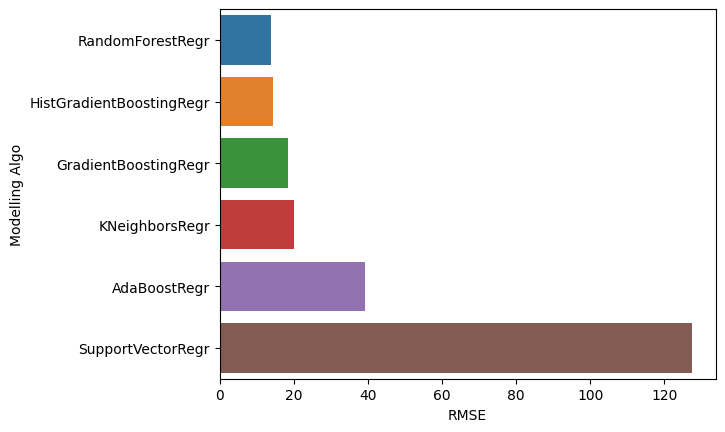

In [21]:
modelling_algo_sorted = modelling_algo.sort_values('RMSE')

sns.barplot(y='Modelling Algo',x='RMSE',data= modelling_algo_sorted)

RandomForestRegr, GradientBoostingRegr and HistGradientBoostingRegr are the most promising algorithms. They well be tuned in the following.

# Random Forest

A random forest is an estimator that fits a number of trees on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting. The sub-sample size is controlled with *max_samples* parameter if *bootstrap = True* (default), otherwise the whole dataset is used to build each tree.

There are important hyperparameters to consider:

**n_estimators:** 
- number of trees in the forest
- default = 100

**criterion:**
- the function to measure the quality of a split 
- default = squared error for the mean squared error 

**max_features:**
- number of features to consider when looking for the best split 

**max_depth:**
- maximum number of levels in the tree
- default = None 
- if None, then nodes are expanded until all leaves are pure / all leaves contain less than min_sample_split samples

**min_samples_split:**
- minimum number of samples required to split a node
- If “auto”, then max_features=n_features.
- If “sqrt”, then max_features=sqrt(n_features).
- If “log2”, then max_features=log2(n_features).
- If None or 1.0, then max_features=n_features.
- default = 1.0 
- Note: The default of 1.0 is equivalent to bagged trees and more randomness can be achieved by setting smaller values, e.g. 0.3. 

**min_samples_leaf:**
- minimum number of samples requiret at each leaf node
- a split point at any depth will onyl be considered it it leaves at least *min_samples_leaf* training samples in each of the left and right branches 
- default = 1 

**bootstrap:**
- method of selecting samples for training each tree
- default = True
- if False, the whole dataset is used to build each tree 

**n_jobs:**
- the number of jobs to run in parallel

**Source:**
- https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html

### Randomized Search CV

In [15]:
np.linspace(start = 100, stop = 1000, num = 10)

array([ 100.,  200.,  300.,  400.,  500.,  600.,  700.,  800.,  900.,
       1000.])

In [11]:
# Create hyperparameter tuning space

n_estimators = [int (x) for x in np.linspace(start = 100, stop = 1000, num = 10)]
max_features = ['auto', 'sqrt', 'log2']
max_depth = [int(x) for x in np.linspace(10, 100, 10)]
min_samples_split = [1,3,5,7,9,11]
min_samples_leaf = [1,2,4,6,8]

In [12]:
# Create the param grid

random_grid = {'n_estimators': n_estimators,
                'max_features': max_features,
                'max_depth': max_depth,
                'min_samples_split': min_samples_split, 
                'min_samples_leaf': min_samples_leaf, 
                }

print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100], 'min_samples_split': [1, 3, 5, 7, 9, 11], 'min_samples_leaf': [1, 2, 4, 6, 8]}


In [11]:
rf = RandomForestRegressor()

In [14]:
# Model with RandomizedSearchCV

rf_random_cv = RandomizedSearchCV (estimator = rf, 
                                     param_distributions = random_grid, 
                                     n_iter = 80, 
                                     cv = 3, 
                                     verbose = 2, 
                                     n_jobs = 16, 
                                     random_state = 22)

# Fit the randomized model

rf_random_cv.fit(X_b_train, y_b_train)

Fitting 3 folds for each of 80 candidates, totalling 240 fits
[CV] END max_depth=30, max_features=log2, min_samples_leaf=4, min_samples_split=1, n_estimators=800; total time=   0.6s
[CV] END max_depth=30, max_features=log2, min_samples_leaf=4, min_samples_split=1, n_estimators=800; total time=   0.6s
[CV] END max_depth=30, max_features=log2, min_samples_leaf=4, min_samples_split=1, n_estimators=800; total time=   0.5s
[CV] END max_depth=70, max_features=auto, min_samples_leaf=8, min_samples_split=1, n_estimators=700; total time=   0.6s
[CV] END max_depth=70, max_features=auto, min_samples_leaf=8, min_samples_split=1, n_estimators=700; total time=   0.5s
[CV] END max_depth=70, max_features=auto, min_samples_leaf=8, min_samples_split=1, n_estimators=700; total time=   0.5s
[CV] END max_depth=100, max_features=log2, min_samples_leaf=8, min_samples_split=3, n_estimators=700; total time= 4.4min


/opt/conda/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py:703: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


[CV] END max_depth=80, max_features=sqrt, min_samples_leaf=1, min_samples_split=9, n_estimators=700; total time= 5.9min
[CV] END max_depth=70, max_features=auto, min_samples_leaf=1, min_samples_split=3, n_estimators=100; total time= 4.4min
[CV] END max_depth=80, max_features=log2, min_samples_leaf=8, min_samples_split=7, n_estimators=700; total time= 4.4min
[CV] END max_depth=80, max_features=sqrt, min_samples_leaf=1, min_samples_split=9, n_estimators=700; total time= 5.8min
[CV] END max_depth=70, max_features=auto, min_samples_leaf=1, min_samples_split=3, n_estimators=100; total time= 4.5min
[CV] END max_depth=80, max_features=log2, min_samples_leaf=8, min_samples_split=7, n_estimators=700; total time= 4.4min
[CV] END max_depth=100, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=900; total time= 7.1min
[CV] END max_depth=70, max_features=auto, min_samples_leaf=1, min_samples_split=3, n_estimators=100; total time= 4.4min
[CV] END max_depth=80, max_features=sqr

/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
42 fits failed out of a total of 240.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
42 fits failed with the following error:
Traceback (most recent call last):
  File "/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py", line 467, in fit
    for i, t in enumerate(trees)
  File "/opt/conda/lib/python3.7/site-packages/joblib/parallel.py", line 1085, in __call__
    if self.dispatch_one_batch(iterator):
  File "/opt/conda/lib/python3.7/site-packages/joblib/par

[CV] END max_depth=60, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=800; total time=32.5min
[CV] END max_depth=90, max_features=sqrt, min_samples_leaf=8, min_samples_split=11, n_estimators=400; total time= 3.0min
[CV] END max_depth=40, max_features=auto, min_samples_leaf=2, min_samples_split=3, n_estimators=600; total time=25.0min
[CV] END max_depth=60, max_features=sqrt, min_samples_leaf=8, min_samples_split=11, n_estimators=600; total time= 4.4min
[CV] END max_depth=10, max_features=log2, min_samples_leaf=6, min_samples_split=11, n_estimators=900; total time= 3.9min
[CV] END max_depth=60, max_features=log2, min_samples_leaf=6, min_samples_split=11, n_estimators=500; total time= 3.3min
[CV] END max_depth=100, max_features=log2, min_samples_leaf=6, min_samples_split=9, n_estimators=200; total time= 1.4min
[CV] END max_depth=100, max_features=auto, min_samples_leaf=1, min_samples_split=9, n_estimators=1000; total time=31.2min
[CV] END max_depth=60, max_featur

RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_iter=80,
                   n_jobs=16,
                   param_distributions={'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 4, 6, 8],
                                        'min_samples_split': [1, 3, 5, 7, 9,
                                                              11],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000]},
                   random_state=22, verbose=2)

RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_iter=80,
                   n_jobs=16,
                   param_distributions={'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 4, 6, 8],
                                        'min_samples_split': [1, 3, 5, 7, 9,
                                                              11],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000]},
                   random_state=22, verbose=2)

In [38]:
# Create new RF model with best hyperparams

rf_best_rand_1 = RandomForestRegressor(n_estimators = 1000,
                                       min_samples_split = 3,
                                       min_samples_leaf = 2,
                                       max_features = 'sqrt',
                                       max_depth = 80,
                                       random_state = 0, 
                                       n_jobs = 32)

# Fit the model to the training data 
rf_best_rand_1.fit(X_b_train, y_b_train)

# Evaluate the performance on the test data

y_pred_rf_1 = rf_best_rand_1.predict(X_b_test)
mse_rf_1 = mean_squared_error(y_b_test, y_pred_rf_1)
rmse_rf_1 = np.sqrt(mse_rf_1)
r2_rf_1 = r2_score(y_b_test, y_pred_rf_1)

print("MSE: ", mse_rf_1)
print("RMSE: ", rmse_rf_1)
print("R-squared: ", r2_rf_1)

MSE:  169.12300863120038
RMSE:  13.004730240616311
R-squared:  0.9698103963827789


**Model with different hyperparameter tuning space**

In [12]:
# Create hyperparameter tuning space 2

n_estimators_2 = [int (x) for x in np.linspace(start = 1000, stop = 1500, num = 10)]
max_features_2 = ['auto', 'sqrt', 'log2']
max_depth_2 = [int(x) for x in np.linspace(10, 30, 5)]
min_samples_split_2 = [11,13,15,18,20]
min_samples_leaf_2 = [1,2,4,6,8]


# Create the param grid

random_grid_2 = {'n_estimators': n_estimators_2,
                'max_features': max_features_2,
                'max_depth': max_depth_2,
                'min_samples_split': min_samples_split_2, 
                'min_samples_leaf': min_samples_leaf_2, 
                }

print(random_grid_2)

{'n_estimators': [1000, 1055, 1111, 1166, 1222, 1277, 1333, 1388, 1444, 1500], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [10, 15, 20, 25, 30], 'min_samples_split': [11, 13, 15, 18, 20], 'min_samples_leaf': [1, 2, 4, 6, 8]}


In [14]:
# Model with RandomizedSearchCV

rf_random_cv_2 = RandomizedSearchCV (estimator = rf, 
                                     param_distributions = random_grid_2, 
                                     n_iter = 40, 
                                     cv = 3, 
                                     verbose = 2, 
                                     n_jobs = 32, 
                                     random_state = 22)

# Fit the randomized model

rf_random_cv_2.fit(X_b_train, y_b_train)

Fitting 3 folds for each of 40 candidates, totalling 120 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=15, n_estimators=1111; total time= 6.9min
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=6, min_samples_split=20, n_estimators=1388; total time=10.7min


/opt/conda/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py:703: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=15, n_estimators=1111; total time= 6.8min
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=11, n_estimators=1166; total time=10.8min
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=15, n_estimators=1111; total time= 6.8min
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=6, min_samples_split=20, n_estimators=1388; total time=10.9min
[CV] END max_depth=30, max_features=log2, min_samples_leaf=2, min_samples_split=20, n_estimators=1166; total time= 8.5min
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=8, min_samples_split=15, n_estimators=1222; total time= 9.5min
[CV] END max_depth=30, max_features=log2, min_samples_leaf=2, min_samples_split=20, n_estimators=1166; total time= 8.5min
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=6, min_samples_split=20, n_estimators=1388; total time=10.6min
[CV] END max_depth=25, m

RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_iter=40,
                   n_jobs=32,
                   param_distributions={'max_depth': [10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 4, 6, 8],
                                        'min_samples_split': [11, 13, 15, 18,
                                                              20],
                                        'n_estimators': [1000, 1055, 1111, 1166,
                                                         1222, 1277, 1333, 1388,
                                                         1444, 1500]},
                   random_state=22, verbose=2)

In [15]:
best_random_grid_2 = rf_random_cv_2.best_params_
print(best_random_grid_2)

{'n_estimators': 1166, 'min_samples_split': 11, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 30}


In [35]:
# Create new RF model with best hyperparams

rf_best_rand_2 = RandomForestRegressor(n_estimators = best_random_grid_2 ['n_estimators'],
                                       min_samples_split = best_random_grid_2 ['min_samples_split'],
                                       min_samples_leaf = best_random_grid_2 ['min_samples_leaf'],
                                       max_features = best_random_grid_2 ['max_features'],
                                       max_depth = best_random_grid_2['max_depth'],
                                       random_state = 0, 
                                       n_jobs = 32)

# Fit the model to the training data 
rf_best_rand_2.fit(X_b_train, y_b_train)

# Evaluate the performance on the test data

y_pred_rf_2 = rf_best_rand_2.predict(X_b_test)
mse_rf_2 = mean_squared_error(y_b_test, y_pred_rf_2)
rmse_rf_2 = np.sqrt(mse_rf_2)
r2_rf_2 = r2_score(y_b_test, y_pred_rf_2)

print("MSE: ", mse_rf_2)
print("RMSE: ", rmse_rf_2)
print("R-squared: ", r2_rf_2)

MSE:  172.75974011996368
RMSE:  13.143809954498114
R-squared:  0.9691612151566604


### Grid Search CV

Select the best performing input parameters from RandomizedSearchCV and give some additional values. No option of iteration in GridSearch CV.

In [19]:
# best parameters from randomized search
best_params_rand = {'n_estimators': 1000, 'min_samples_split': 3, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 80}

In [22]:
grid_search = {
    'n_estimators': [best_params_rand['n_estimators']-200,
                    best_params_rand['n_estimators']-100,
                    best_params_rand['n_estimators'],
                    best_params_rand['n_estimators']+100,
                    best_params_rand['n_estimators']+200,
                    ],
    'max_depth': [best_params_rand['max_depth']],
    'min_samples_split': [best_params_rand['min_samples_split']-2,
                         best_params_rand['min_samples_split']-1,
                         best_params_rand['min_samples_split'],
                         best_params_rand['min_samples_split']+1,
                         best_params_rand['min_samples_split']+2,
                         ],
    'min_samples_leaf': [best_params_rand['min_samples_leaf'],
                        best_params_rand['min_samples_leaf']+2,
                        best_params_rand['min_samples_leaf']+4,
                        ],
    'max_features': [best_params_rand['max_features']],
}

print(grid_search)

{'n_estimators': [800, 900, 1000, 1100, 1200], 'max_depth': [80], 'min_samples_split': [1, 2, 3, 4, 5], 'min_samples_leaf': [2, 4, 6], 'max_features': ['sqrt']}


In [24]:
# Fit grid_search to the training data 

rf_grid_search_cv = GridSearchCV(estimator = rf, param_grid = grid_search, cv = 2, n_jobs = 32, verbose = 2)
rf_grid_search_cv.fit(X_b_train, y_b_train)

Fitting 2 folds for each of 75 candidates, totalling 150 fits
[CV] END max_depth=80, max_features=sqrt, min_samples_leaf=2, min_samples_split=1, n_estimators=1000; total time=   0.9s
[CV] END max_depth=80, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=1100; total time= 9.2min
[CV] END max_depth=80, max_features=sqrt, min_samples_leaf=4, min_samples_split=3, n_estimators=1000; total time= 7.3min


/opt/conda/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py:703: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


[CV] END max_depth=80, max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimators=1100; total time= 9.5min
[CV] END max_depth=80, max_features=sqrt, min_samples_leaf=4, min_samples_split=3, n_estimators=1100; total time= 8.5min
[CV] END max_depth=80, max_features=sqrt, min_samples_leaf=2, min_samples_split=1, n_estimators=1200; total time=   1.0s
[CV] END max_depth=80, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=800; total time= 6.7min
[CV] END max_depth=80, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=1000; total time= 8.2min
[CV] END max_depth=80, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=900; total time= 6.8min
[CV] END max_depth=80, max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimators=1100; total time= 9.1min
[CV] END max_depth=80, max_features=sqrt, min_samples_leaf=4, min_samples_split=3, n_estimators=900; total time= 6.9min
[CV] END max_depth=80, max_features

/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
30 fits failed out of a total of 150.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py", line 467, in fit
    for i, t in enumerate(trees)
  File "/opt/conda/lib/python3.7/site-packages/joblib/parallel.py", line 1085, in __call__
    if self.dispatch_one_batch(iterator):
  File "/opt/conda/lib/python3.7/site-packages/joblib/par

[CV] END max_depth=80, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=1200; total time=10.5min
[CV] END max_depth=80, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=900; total time= 6.7min
[CV] END max_depth=80, max_features=sqrt, min_samples_leaf=6, min_samples_split=2, n_estimators=1200; total time= 7.9min
[CV] END max_depth=80, max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimators=1200; total time=10.0min
[CV] END max_depth=80, max_features=sqrt, min_samples_leaf=4, min_samples_split=3, n_estimators=1200; total time= 8.6min
[CV] END max_depth=80, max_features=sqrt, min_samples_leaf=6, min_samples_split=3, n_estimators=1000; total time= 6.7min
[CV] END max_depth=80, max_features=sqrt, min_samples_leaf=2, min_samples_split=1, n_estimators=1100; total time=   1.0s
[CV] END max_depth=80, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=1200; total time=10.5min
[CV] END max_depth=80, max_featur

GridSearchCV(cv=2, estimator=RandomForestRegressor(), n_jobs=32,
             param_grid={'max_depth': [80], 'max_features': ['sqrt'],
                         'min_samples_leaf': [2, 4, 6],
                         'min_samples_split': [1, 2, 3, 4, 5],
                         'n_estimators': [800, 900, 1000, 1100, 1200]},
             verbose=2)

In [25]:
# Predictions on test set

rf_grid_search_cv.predict(X_b_test)

array([2.28410767e-04, 1.97383323e+01, 2.64028426e-01, ...,
       1.08291933e+01, 2.57292021e+01, 1.18528025e+01])

In [27]:
best_grid = rf_grid_search_cv.best_params_
print(best_grid)

{'max_depth': 80, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 1000}


In [32]:
from sklearn.metrics import r2_score

# Create a new Random Forest model with the best hyperparameters
rf_grid = RandomForestRegressor(n_estimators=best_grid['n_estimators'], 
                                max_depth= best_grid['max_depth'], 
                                max_features= best_grid['max_features'],
                                min_samples_leaf= best_grid['min_samples_leaf'], 
                                min_samples_split= best_grid['min_samples_split'],
                                random_state=0, 
                                n_jobs = 32)

# Fit the model to the entire training set
rf_grid.fit(X_b_train, y_b_train)

# Evaluate the performance of the model on the test set
y_b_pred_grid = rf_grid.predict(X_b_test)

mse_grid = mean_squared_error(y_b_test, y_b_pred_grid)
rmse_grid = np.sqrt(mse_grid)
r2_grid = r2_score(y_b_test, y_b_pred_grid)
print("MSE: ", mse_grid)
print("RMSE: ", rmse_grid)
print("R-squared: ", r2_grid)

MSE:  169.12300863120038
RMSE:  13.004730240616311
R-squared:  0.9698103963827789


## Model evaluation

# Gradient Boosting Regression Tree (=GBRT)
* this estimator builds an additive model in a forward stage-wise fashion
* it allows for the optimization of arbitrary differentiable loss functions 
* in each stage a regression tree is fit on the negative gradient of the given loss function 
<br> 

**There are 8 important hyperparameters to consider:** 

**loss function**: <br>
* The type of residual error / loss function that will be used
* default = squared error <br>

**criterion**: <br>
* the function to measure the quality of a split 
* default = friedman_mse for the mean squared error with improvement score by friedmann <br>

**subsample**: <br>
* the proportion of cases to be randomly sampled (without replacement) for each tree
* values are between 0.0 and 1.0
* setting this to 1 uses all the cases in the training set 
* if smaller than 1.0 this results in stochastic gradient boosting (reduction of variance and increase in bias)
* it interacts with the parameter n_estimator
* default = 1.0 <br>

**learning rate**: <br>
* This is a number between 0.0 and infinity, which model weights are multiplied to give their final weight. 
* It shrinks the contribution of each tree by *learning_rate*. 
* The smaller the learning rate, the smaller steps towards the optimal solution. 
* Pro: Preventing the ensemble from learning too quickly prevents overfitting
* Con: longer training times as a smaller learning rate will require more trees to be added to the ensemble to achieve the same level of performance
* default = 0.1 <br>

**n_estimators**: <br>
* the number of boosting stages to perform (between 1 and infinity)
* equivalent to the number of weak learners to be used in the ensemble
* large number usually results in better performance 
* Note: there is a trade-off between *learning_rate* and *n_estimators*
* default = 100

**min_impurity_decrease**: <br>
* a node will be split if this split induces a decrease of the impurity greater than or equal to this value (between 0.0 and infinity)
* weighted impurity decrease equation:
* N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)

**max_depth**: <br>
* the maximum levels deep that each tree can grow (between 1 and infinity) 
* limits the number of nodes in the tree
* if None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_sample_split samples

**max_features**: 
* the number of features to consider when looking for the best split

**min_samples_leaf**: <br>
* another regularization hyperparameter that sets the minimum number of samples required to be at a lead node. <br>

**verbose**: <br>
* if 1 then it prints progress and performance once in a while (the more trees, the lower the frequency)
* if greater than 1 then it prints progress and performance for every tree
* default = 0

**random_state**: <br>
* sets a random seed for reproducibility

**Source**: <br>
https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingRegressor.html

The default of squared error is appropriate and will be used in the implementation.

## Train the model on the training set

In [16]:
gbrt = GradientBoostingRegressor(random_state = 22, verbose = True)
gbrt.fit(X_a_train, 
         y_a_train)

      Iter       Train Loss   Remaining Time 
         1        4670.6319            1.16m
         2        3896.7238            1.07m
         3        3265.6653            1.03m
         4        2751.3441           59.90s
         5        2332.3904           58.75s
         6        1988.4962           57.95s
         7        1709.5221           57.21s
         8        1480.3053           56.41s
         9        1288.6601           55.90s
        10        1131.9695           55.11s
        20         497.6781           48.60s
        30         388.5262           42.31s
        40         355.1915           36.22s
        50         341.9470           30.13s
        60         330.1980           24.08s
        70         323.9775           18.02s
        80         318.0555           12.01s
        90         313.2941            6.04s
       100         307.3791            0.00s


GradientBoostingRegressor(random_state=22, verbose=True)

## Make predictions on the testing set

In [17]:
y_prediction_a = gbrt.predict(X_a_test)
y_prediction_a

array([-0.36201858, 22.70909011, -0.73730653, ..., 76.13522229,
        0.94756016, 78.05174669])

## Evaluate the model

In [18]:
# MSE

mse_a = mean_squared_error(y_a_test, y_prediction_a)
print("MSE: %0.2f" % (mse_a))

MSE: 307.23


In [19]:
# RMSE

rmse_a = np.sqrt (mse_a)
print("RMSE: %0.2f" % (rmse_a))

RMSE: 17.53


## Plot training deviance

The training deviance in the context of an XGBoost regression model is a metric that measures the goodness of fit of the model on the training data. Specifically, the training deviance is the loss function of the XGBoost model on the training data at each stage of the boosting process.

In the case of XGBoost regression, the loss function is usually the mean squared error (MSE) between the predicted values and the true target values. During the training process, the XGBoost model is iteratively fitted to the training data, with each iteration adding a new decision tree to the model. After each iteration, the training deviance is calculated as the MSE between the predicted values and the true target values on the training data.

The training deviance is an important metric for monitoring the training process of an XGBoost regression model. It can be used to check for overfitting, as a model that is overfitting will have a decreasing training deviance but a increasing validation deviance. It can also be used to compare the performance of different models trained on the same dataset, with lower training deviance indicating a better fit to the training data.

In [ ]:
# Compute the test set deviance
test_score = np.zeros((gbrt.n_estimators,), dtype=np.float64)
for i, y_pred in enumerate(gbrt.staged_predict(X_a_test)):
    test_score[i] = gbrt.loss_(y_a_test, y_pred)

# Plot the deviance against boosting iterations
plt.figure(figsize=(12, 6))
plt.title('Deviance')
plt.plot(np.arange(gbrt.n_estimators) + 1, gbrt.train_score_, 'b-',
         label='Training Set Deviance')
plt.plot(np.arange(gbrt.n_estimators) + 1, test_score, 'r-',
         label='Test Set Deviance')
plt.legend(loc='upper right')
plt.xlabel('Boosting Iterations')
plt.ylabel('Deviance')
plt.show()

In [20]:
# k-fold cross validation 
# evaluate the model on several test sets (validation sets), so that we can make sure we don't get lucky on one single test set

accuracies_a = cross_val_score(estimator = gbrt, X = X_a_train, y = y_a_train, cv = 10)

      Iter       Train Loss   Remaining Time 
         1        4670.3949           54.82s
         2        3897.8865           53.31s
         3        3267.1672           52.14s
         4        2751.4570           51.42s
         5        2332.2837           50.79s
         6        1991.2955           50.46s
         7        1712.6558           50.09s
         8        1483.9394           49.44s
         9        1291.6169           48.96s
        10        1134.9911           48.27s
        20         501.3560           42.65s
        30         390.2714           37.21s
        40         358.7500           31.85s
        50         341.0241           26.53s
        60         332.1974           21.22s
        70         326.4393           15.88s
        80         320.7572           10.58s
        90         314.1639            5.29s
       100         308.8504            0.00s
      Iter       Train Loss   Remaining Time 
         1        4652.8286           55.09s
        

In [21]:
# Mean and standard deviation of the accuracy metric

print("Cross-validation scores:", accuracies_a)
print("Mean of the metric:", accuracies_a.mean())
print("Standard deviation of the metric:", accuracies_a.std())

Cross-validation scores: [0.9466924  0.94432298 0.94365346 0.94482792 0.94667863 0.94379101
 0.94468041 0.94403046 0.94361499 0.94446869]
Mean of the metric: 0.9446760964515262
Standard deviation of the metric: 0.0010788131046527134


The mean accuracy is 94.5%. <br>
Similarly the standard deviation of the accuracies resulting from these 10 validation datasets is 0.1%. <br>

Interpretation of the results: <br>
Through k-Fold Cross Validation, we need to estimate the "unbiased error" on the dataset from this model. The mean is a good estimate of how the model will perform on the dataset. Then once we are convinced that the average error is acceptable, we train the same model on all of the dataset.
<br>
The Standard Deviation of the model’s accuracy simply shows that the variance of the model accuracy is 4.5%. This means the model can vary about 4.5%, which means that if we run our model on new data and get an accuracy of 96.6%, we know that this is like within 92.1 to 100% accuracy. Bias and accuracy sometimes don’t have an obvious relationship, but most of the time we can spot some bias in the validation or testing of our model when it does not preform properly on new data.

Source: <br>
* https://www.sqlservercentral.com/articles/model-selection-and-performance-boosting-with-k-fold-cross-validation-and-xgboost
* https://www.kaggle.com/questions-and-answers/154600

## Improve accuracy through hyperparameter tuning

**XGBoost Hyperparamter Optimization Methods**: <br>
**exhaustive grid searches (GS)**: <br>
* Exhaustive grid search (GS) is an exhaustive search over every combi of specified parameter values. It discovers the optimal settings by computing and comparing the cross-validation loss for each one. Ideally, for efficiency, the search pattern is random (Restrepo, 2018). <br>
* Hyperparamter optimizer: model_selection.GridSearchCV(estimator, ...)

**coordinate descent (CD)**: <br>
* Coordinate descent (CD) may be the simplest optimization method for setting hyperparameters. Like gradient descent, it’s an iterative algorithm and searches one vector or direction of possible hyperparameter settings at a time and continues in the direction that appears to be most promising. It continues this scan until no further directions yield any more improvements (Restrepo, 2018). <br>

**genetic algorithm **: <br>
* Genetic algorithms are an entire class for optimization and work exceptionally well in discrete search spaces with many, or high, dimensions. They mimic natural selection by simulating a population of possible solutions and the most correct survive. New generations are generated either by crossbreeding, wherein two possible solutions are combined, or mutation, wherein individual parameter settings can “mutate” by being replaced. Fitness or “best” is defined as the options with the negative of the loss function (Restrepo, 2018). <br>

**Source**: <br>
https://towardsdatascience.com/mastering-xgboost-2eb6bce6bc76

In the following section, grid search is used for hyperparameter tuning.

In [22]:
# Definition of hyperparameters to tune and corresponding ranges

param_grid = {
    'learning_rate': [0.01, 0.1, 1],
    'n_estimators': [100, 500, 1000],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2'],
    'subsample': [0.5, 0.75, 1.0]
}

In [23]:
# Create an instance of 'GridSearchCV' and pass the model, the parameter grid, and the number of cross-validation folds

from sklearn.model_selection import GridSearchCV

gbrt = GradientBoostingRegressor(random_state=22)

grid_search = GridSearchCV(gbrt, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

In [ ]:
# Fit grid search to the training data

grid_search.fit(X_a_train, y_a_train)

In [ ]:
# Print the best hyperparameters and the corresponding mean cross-validation score

print("Best parameters:", grid_search.best_params_)
print("Best cross-validation score:", np.sqrt(-grid_search.best_score_))

## Plot feature importance

Warning Careful, impurity-based feature importances can be misleading for high cardinality features (many unique values). As an alternative, the permutation importances of reg can be computed on a held out test set. See Permutation feature importance for more details.
For this example, the impurity-based and permutation methods identify the same 2 strongly predictive features but not in the same order. The third most predictive feature, “bp”, is also the same for the 2 methods. The remaining features are less predictive and the error bars of the permutation plot show that they overlap with 0.